In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [49]:
class SimpleLinearRegression: 
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations 
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        self.weights = np.zeros((X_b.shape[1], 1))
        
        for _ in range(self.n_iterations):
            predictions = X_b.dot(self.weights)
            errors = predictions - y.reshape(-1, 1)
            
            gradients = 2 / X_b.shape[0] * X_b.T.dot(errors)
            self.weights -= self.learning_rate * gradients

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        predictions = X_b.dot(self.weights)
        
        return predictions

In [50]:
data=pd.read_csv("./1000_Companies.csv")

In [51]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [53]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [54]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

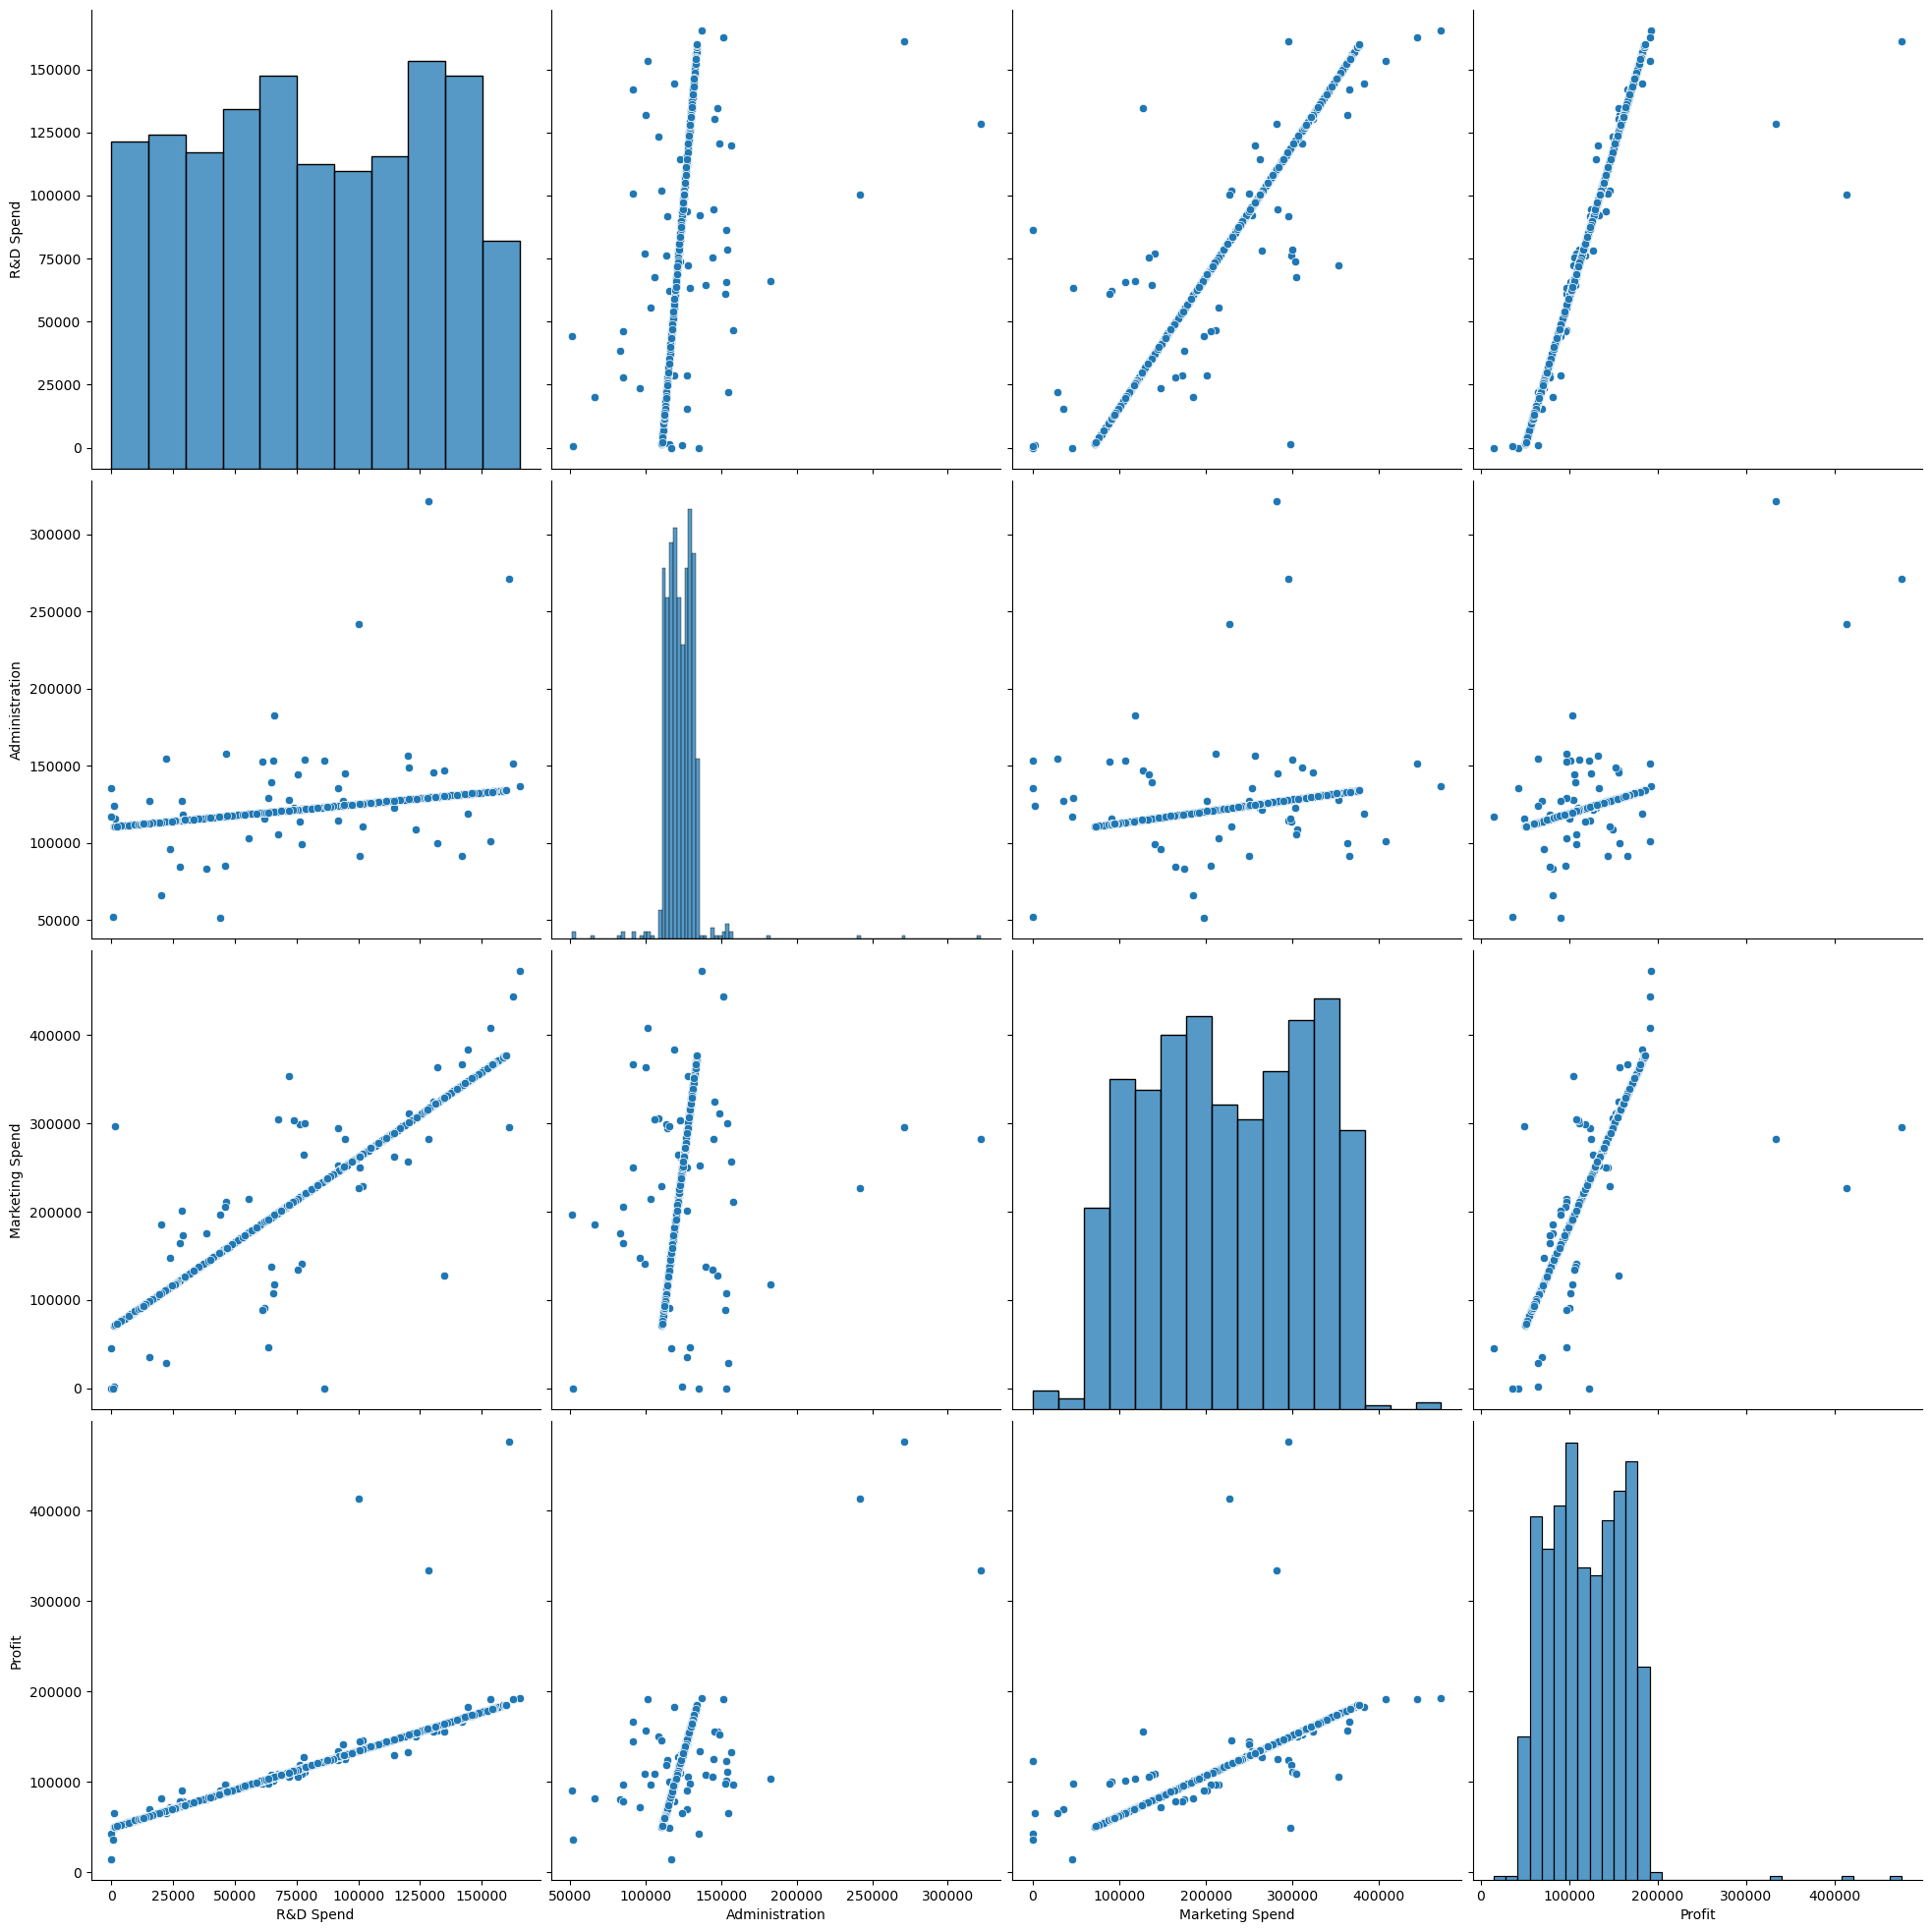

In [55]:
sns.pairplot(data,height=5,markers=["o", "s", "D"])
plt.show()

In [56]:
label_data=data["Profit"]
dummy=pd.get_dummies(data.State)
final_data=pd.concat([data,dummy],axis=1)
final_data.drop(['State'],axis=1,inplace=True) 
final_data=final_data.drop(["Profit"],axis=1)
final_data.head(5)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False


In [57]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
final_data=scale.fit_transform(final_data)
final_data 

array([[1.        , 0.31665857, 1.        , 0.        , 0.        ,
        1.        ],
       [0.98335946, 0.37021423, 0.94089337, 1.        , 0.        ,
        0.        ],
       [0.92798459, 0.18442355, 0.8646636 , 0.        , 1.        ,
        0.        ],
       ...,
       [0.60644666, 0.70512215, 0.48145501, 1.        , 0.        ,
        0.        ],
       [0.77687845, 1.        , 0.59707888, 1.        , 0.        ,
        0.        ],
       [0.97479589, 0.81243308, 0.62622324, 0.        , 0.        ,
        1.        ]])

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(final_data,label_data,test_size=0.2,random_state=42)
model=SimpleLinearRegression()
model.fit(X_train,Y_train.values.reshape(-1, 1))
pred=model.predict(X_test)  
print(pred[:5])

[[125213.2823049 ]
 [113770.02171403]
 [ 94691.4552083 ]
 [127838.4043269 ]
 [157535.83315355]]


In [59]:
r2 = r2_score(Y_test.values.reshape(-1, 1), pred)  
print(f'R-squared Score: {r2}') 

R-squared Score: 0.9101585062877905
